<a href="https://colab.research.google.com/github/hetpatel007/GIS-1/blob/main/GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INDIAN FOOD PREFERENCE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

In [ ]:
! wget -q -O GIS_INDIA_MAP.zip https://docs.google.com/uc?id=1BHlY3nu1CY1eg0ULpvQDbYobmXMQaB9N&export=download
zip_ref = zipfile.ZipFile('GIS_INDIA_MAP.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
shp_gdf=gpd.read_file('Indian_states.shp') #load the shapefile

<Axes: >

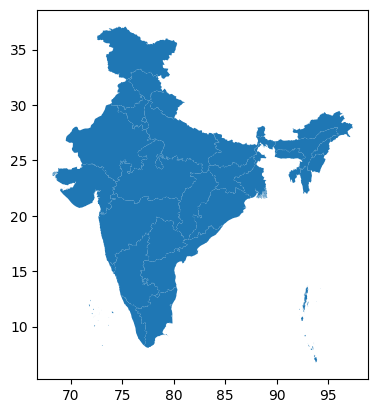

In [ ]:
shp_gdf.plot()

In [ ]:

import numpy as np
import pandas as pd
%matplotlib inline
import random

import matplotlib.pyplot as plt
import os

In [ ]:
df = pd.read_csv('indian_food.csv')
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [ ]:
df.shape

(255, 9)

In [ ]:
shp_gdf = gpd.read_file('Indian_states.shp')

In [ ]:
shp_gdf.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


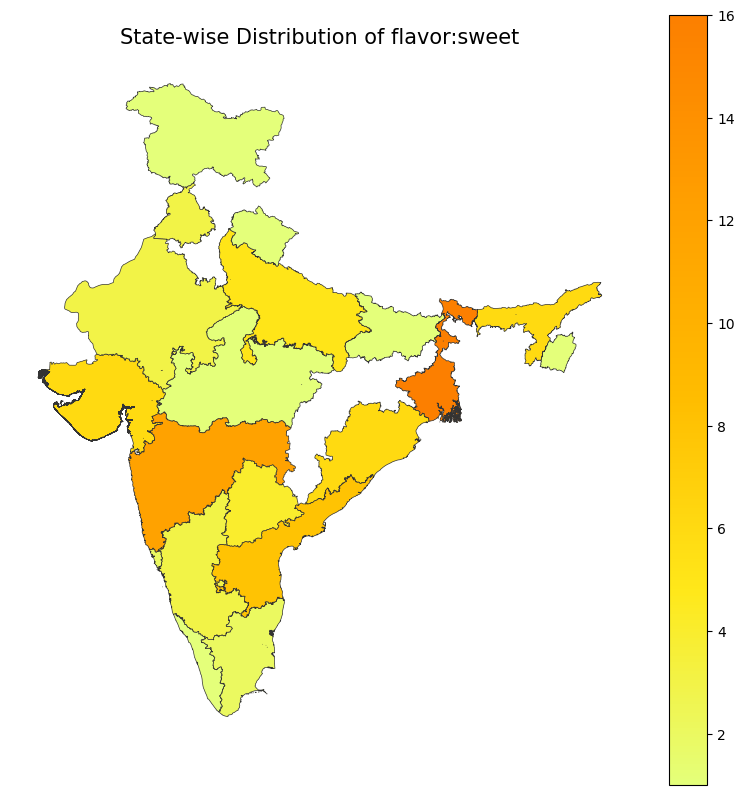

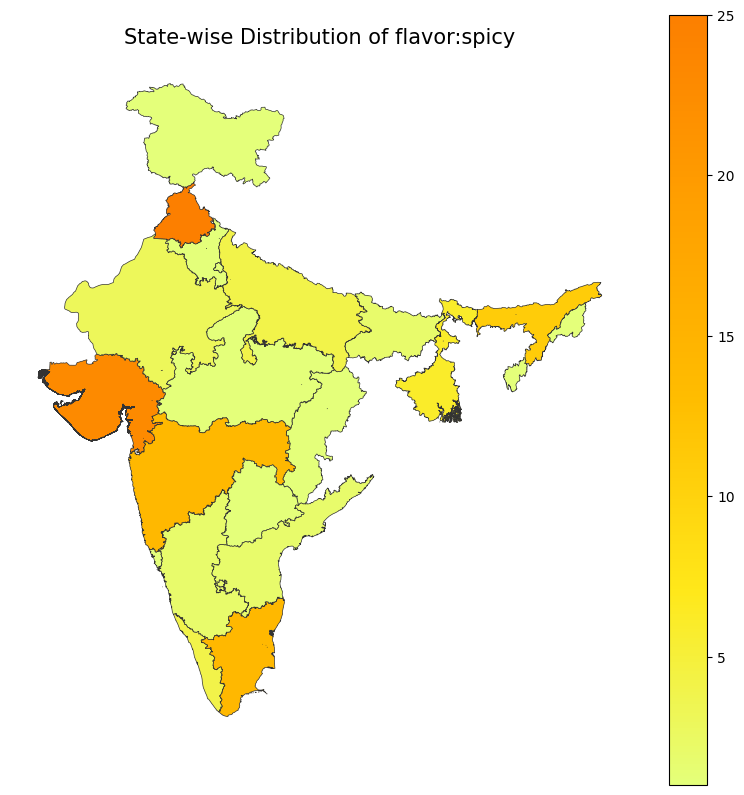

In [ ]:
flavor_profile_list = ['sweet', 'spicy']

import geopandas as gpd


for flavor_profile in flavor_profile_list:
    shp_gdf = gpd.read_file('Indian_states.shp')
    profile = df[df['flavor_profile']==flavor_profile]
    prof_df = profile.state.value_counts().reset_index()
    prof_df.columns = ['state','count']
    merged = shp_gdf.set_index('st_nm').join(prof_df.set_index('state'))
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.axis('off')
    ax.set_title('State-wise Distribution of flavor:'+ str(flavor_profile),
                 fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = merged.plot(column='count', cmap='Wistia', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [ ]:
shp_gdf.dtypes

st_nm         object
geometry    geometry
dtype: object

In [ ]:
!pip install mapclassify
import mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 796.5 kB/s eta 0:00:00


In [ ]:
!ls

sample_data
